In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

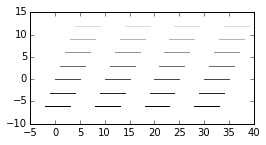

In [4]:
class P:
    def __init__(S, cycle, delta,d,red,vf,w,q0):
        S.cycle,S.delta,S.d,S.vf,S.red,S.w,S.q0 = cycle,delta,d,vf,red,w,q0
        S.kj = S.q0/(-S.w)+S.q0/S.vf
        S.base_intervals = [[j*S.cycle,(j+S.red)*S.cycle] for j in range(0,4)]
    def solve(S):
        x,res,g,l = 0, [], 1000,0
        #first go forward
        while g>0:
            t = S.red*S.cycle+x/S.vf
            g = S.green_left(t,l)
            time_stopped = max(0,g)
            res.append({'x': x, 't':t, 'g': g, 'l':l, 'c': S.q0*time_stopped})
            x+=S.d
            l+=1
        x,g,l = S.d/S.w, 1000,-1
        while g>0:
            t = S.red*S.cycle+x/S.w
            g = S.green_left(t,l)
            rec = {'x': x, 't':t, 'g': g, 'l':l, 'c': S.kj*t}
            res.append(rec)
            x-=S.d
            l-=1
            if l<-5:
                break
        return np.array(res)
    # pd.DataFrame.from_records(q.solve(),index='l').sort()
    def green_left(S,t,l):
        r = (t+abs(l)*S.delta)%S.cycle
        if r<(S.cycle*S.red):
            return r-S.cycle*S.red
        else:
            return S.cycle-r
    def green(S,stopping_point):
        res = np.array(S.base_intervals)+stopping_point*S.delta
        return res
    def plot(S):
        stopping_points = range(-2,6)
        fig,ax = plt.subplots(figsize=(4,2))
        for i,l in enumerate(stopping_points):
            intervals = S.green(l)
            for interval in intervals:
                ax.plot(interval,[S.d*l,S.d*l],c=str(i/7.))
        plt.show()
    def find_min(S,k):
        table = S.solve()
        cost = 10000.
        for e in table:
            e['c2'] = (k*e['x'] + e['c'])/e['t']
            if cost > e['c2']:
                cost = e['c2']
                res = e
        return res
                
# cycle,delta,d,red,vf,w,q0
q = P(10,1,3,.5,3,-1,3)
q.plot()

In [5]:
q.solve()

array([{'x': 0, 'c': 15.0, 't': 5.0, 'g': 5.0, 'l': 0},
       {'x': 3, 'c': 9.0, 't': 6.0, 'g': 3.0, 'l': 1},
       {'x': 6, 'c': 3.0, 't': 7.0, 'g': 1.0, 'l': 2},
       {'x': 9, 'c': 0, 't': 8.0, 'g': -4.0, 'l': 3},
       {'x': -3.0, 'c': 32.0, 't': 8.0, 'g': 1.0, 'l': -1},
       {'x': -6.0, 'c': 44.0, 't': 11.0, 'g': -2.0, 'l': -2}], dtype=object)

In [103]:
k=0.
while k<q.kj:
    res = q.find_min(k)
    k+=.5
    print res,k

{'c': 0, 'g': -4.0, 'l': 3, 't': 8.0, 'x': 9, 'c2': 0.0} 0.5
{'c': 0, 'g': -4.0, 'l': 3, 't': 8.0, 'x': 9, 'c2': 0.5625} 1.0
{'c': 0, 'g': -4.0, 'l': 3, 't': 8.0, 'x': 9, 'c2': 1.125} 1.5
{'c': 0, 'g': -4.0, 'l': 3, 't': 8.0, 'x': 9, 'c2': 1.6875} 2.0
{'c': 3.0, 'g': 1.0, 'l': 2, 't': 7.0, 'x': 6, 'c2': 2.142857142857143} 2.5
{'c': 3.0, 'g': 1.0, 'l': 2, 't': 7.0, 'x': 6, 'c2': 2.5714285714285716} 3.0
{'c': 44.0, 'g': -2.0, 'l': -2, 't': 11.0, 'x': -6.0, 'c2': 2.3636363636363638} 3.5
{'c': 44.0, 'g': -2.0, 'l': -2, 't': 11.0, 'x': -6.0, 'c2': 2.090909090909091} 4.0
